As an example from T15Gen2, corporate mastered.

This procedure needs admin rights on 2 steps ([install nvidia drivers](/posts/2022-12-15-wsl2-fresh-pc.html#install-nvidia-driver), [activate wsl](/posts/2022-12-15-wsl2-fresh-pc.html#activate-wsl))

And if based on WSL from Windows store (`wsl --version`>=1.0), lots of new features such as systemd, snap, integrated display, etc. Detailed in [WSL2 from Windows Store](/posts/2022-12-19-wsl2-from-windows-store.html)

# Preparation

## install Windows Terminal

Just install `Windows Terminal` from Windows Store at https://aka.ms/terminal

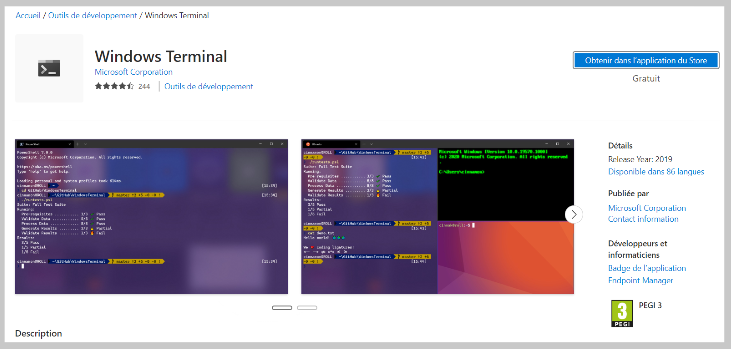

## download Nvidia driver

To get drivers in link to cuda versions:

https://developer.nvidia.com/cuda-toolkit-archive

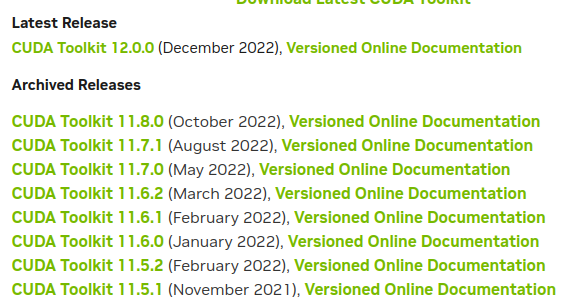

(Jan-18 23: cuda 11.7.1 using `cuda_11.7.1_516.94_windows.exe`)

```text
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 516.94       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0  On |                  N/A |
| N/A   54C    P8    18W /  N/A |    274MiB / 16384MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
```

## download Ubuntu LTS image

Download from https://cloud-images.ubuntu.com/daily/server/wsl/ 

This address may change (search for « [cloud wsl ubuntu images](https://www.google.com/search?q=cloud+wsl+ubuntu+images&rlz=1C1GCEB_enFR1022FR1022&oq=cloud+wsl+ubuntu+images&aqs=chrome.0.69i59j69i60l3.344j0j7&sourceid=chrome&ie=UTF-8) »)

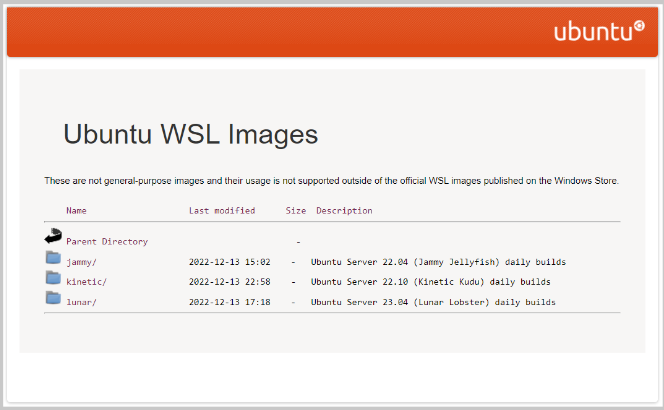

(Dec-22: this file `ubuntu-jammy-wsl-amd64-wsl.rootfs.tar.gz`)

# Installation

## install Nvidia driver

as admin, install the driver

## install Ubuntu in WSL

### activate WSL

as admin, open windows terminal, and run

```bash
wsl --install
wsl --set-default-version 2
```

### update WSL, upgrade WSL

I am closely following new updates from WSL and WSLg at https://github.com/microsoft/WSL/releases

To know which version we use, run `wsl --version` in Powershell.

And to upgrade to the latest version, run `wsl --update --pre-release`

### install Ubuntu LTS

following instructions from [install ubuntu 22.04 on WSL # Automatic setup](/posts/2022-04-25-install%20ubuntu%2022.04%20on%20WSL.html#automatic-setup). 

And here are the steps

Create 2 folders: `C:\wsl\Ubuntu-22.04\download`, `C:\wsl\Ubuntu-22.04\instance`

Move `ubuntu-jammy-wsl-amd64-wsl.rootfs.tar.gz` in `C:\wsl\Ubuntu-22.04\download`

Copy scripts [`setup_wsl_root.sh`](https://raw.githubusercontent.com/castorfou/blog/main/files/setup_wsl_root.sh) and [`setup_wsl_user.sh`](https://raw.githubusercontent.com/castorfou/blog/main/files/setup_wsl_user.sh) to `C:\wsl\Ubuntu-22.04\download`

#### install wsl-vpnkit

Copy [`wsl-vpnkit`](https://github.com/sakai135/wsl-vpnkit/releases/download/v0.3.8/wsl-vpnkit.tar.gz) to `C:\wsl\Ubuntu-22.04\download` (see https://dev.michelin.com/wsl2/fundamentals for more details)

Install wsl-vpnkit from Windows Terminal: 
```
wsl --import wsl-vpnkit $env:USERPROFILE\wsl-vpnkit C:\wsl\ubuntu-22.04\download\wsl-vpnkit.tar.gz
wsl -d wsl-vpnkit
wsl -d wsl-vpnkit service wsl-vpnkit start
```

#### install ubuntu and setup root

Install ubuntu-lts from Windows Terminal: 

```
wsl --import ubuntu-22.04 C:\wsl\ubuntu-22.04\instance C:\wsl\ubuntu-22.04\download\ubuntu-jammy-wsl-amd64-wsl.rootfs.tar.gz
# close windows terminal / launch it (ubuntu-22.04 entry should be added within it)
wsl -d ubuntu-22.04 # or launch from Windows Terminal menu
cd
cp /mnt/c/wsl/Ubuntu-22.04/download/setup_wsl_* ~/
chmod +x setup_wsl_root.sh
./setup_wsl_root.sh
``` 

Provide username, password and quit session with Ctrl-D
    

From Windows Terminal, stop wsl with `wsl -t ubuntu-22.04`, a new profile for ubuntu-22.04 should have been automatically created in Windows Terminal

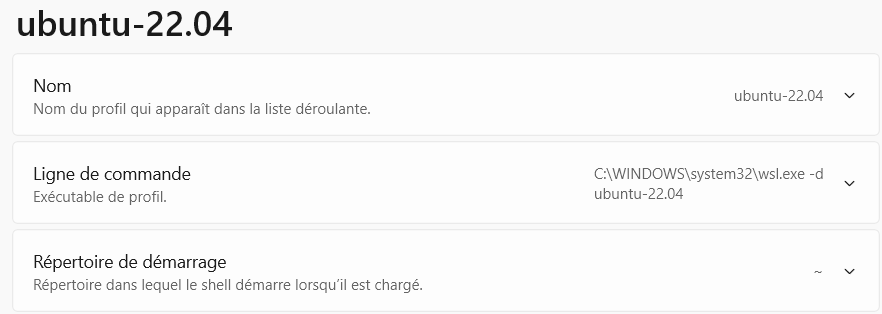

#### setup user

Start `ubuntu-22.04` by clicking the profile in Windows Terminal

Should start with something like

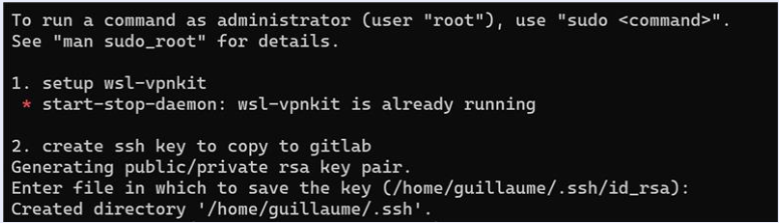

Step 2: accept default entries (type enter). Add the generated key to gitlab > preferences > SSH keys. And then resume.


At that stage this is a fully operating image of ubuntu (internet, apt)

### activate systemd

If running wsl version > 1.0, you can [activate systemd](/posts/2022-12-19-wsl2-from-windows-store.html#systemd)

Modify `/etc/wsl.conf` with

```bash
[boot]
systemd=true
```

And restart wsl image (`wsl -t ubuntu-22.04`)

Test that it works by running

```bash
systemctl list-unit-files --type=service
```

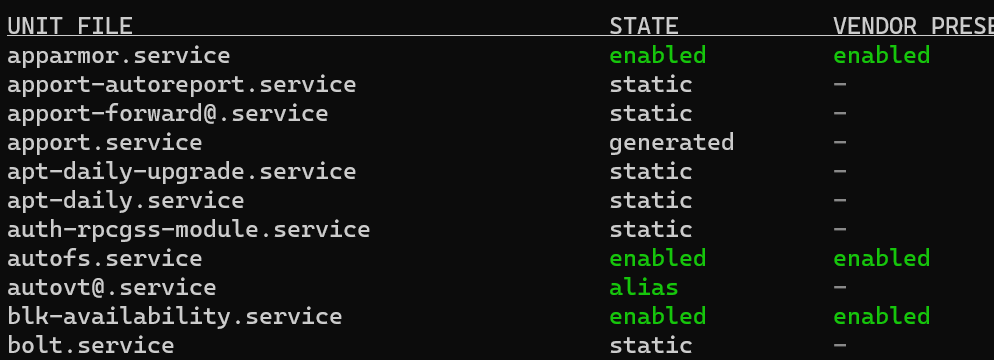

# Configure Ubuntu LTS for Python/AI development

## keep config files in git

I have explained how and why to do this step at [keep dotfiles in git](/posts/2022-04-07-keep%20dotfiles%20in%20git.html)

```bash
wget --no-check-certificate --content-disposition -O - https://raw.githubusercontent.com/castorfou/blog/master/files/setup_wsl_00_config_files_in_git.sh | bash
source ~/.bashrc
```

TODO: take branch name as a parameter. Meanwhile download the script and update branch name to something new

## git credential manager to push on github

This is explained at [git-credential-manager repo](https://github.com/GitCredentialManager/git-credential-manager/blob/main/README.md)

```bash
wget --no-check-certificate --content-disposition -O - https://raw.githubusercontent.com/castorfou/blog/master/files/setup_wsl_06_git_credential_manager.sh | bash
```

You need to create a personal access token in github.

And when pushing to a github repo, use this token as the password

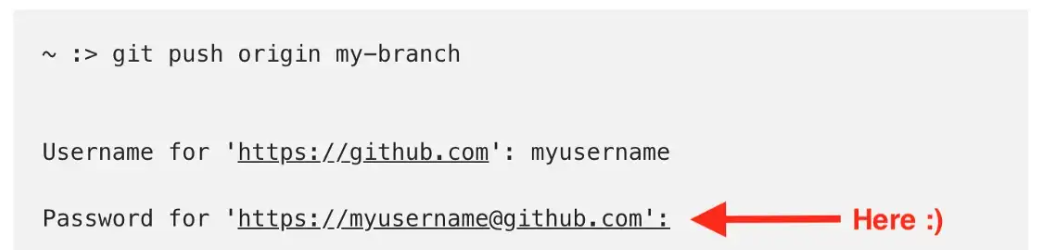

## (optional) automount secured vbox

Because I keep secured data within my secured disks mounted in windows (Z:, Y:, ...)

```bash
wget --no-check-certificate --content-disposition -O - https://raw.githubusercontent.com/castorfou/blog/master/files/setup_wsl_01_automount_secured_vbox.sh | bash
```

Modify `/etc/vbox.autofs` to match your actual mounted disks. `sudo service autofs start` to start the service.

if it fails, check that kernel is at least v5. `uname -a`. If not maybe in WSL 1 insted of WSL 2? (`sudo automount -f -v
` should provide more information)

In [5]:
#my vbox.autofs file
!cat /etc/vbox.autofs

janus   -fstype=drvfs,uid=1000,gid=1000 :Z:


if `systemd` is activated, we can manage services with `journalctl`

```bash
#restart autofs
sudo systemctl restart autofs.service

#read logs for autofs (-r: display last entries first)
#to use it as user, add your user to adm group
#sudo usermod -a -G adm <your_username>
journalctl -r -u autofs

#print warning
journalctl -r -p warning
```

other examples with journalctl: 

https://www.geeksforgeeks.org/journalctl-command-in-linux-with-examples/



## python with conda and configure base environment (jupyterlab, mamba)


Give a look to [script sources](/posts/2022-04-25-install%20ubuntu%2022.04%20on%20WSL.html#python-with-conda-and-configure-base-environment-jupyterlab-mamba)

```bash
# install miniconda
wget --no-check-certificate --content-disposition -O - https://raw.githubusercontent.com/castorfou/blog/master/files/setup_wsl_02_install_python_conda_part1.sh | bash
source ~/.bashrc
# install mamba
wget --no-check-certificate --content-disposition -O - https://raw.githubusercontent.com/castorfou/blog/master/files/setup_wsl_02_install_python_conda_part2.sh | bash
source ~/.bashrc
# install certificates for Python
wget --no-check-certificate --content-disposition -O - https://raw.githubusercontent.com/castorfou/blog/master/files/setup_wsl_02_install_python_conda_part3.sh | bash
source ~/.bashrc
# create base_jupyter environment
wget --no-check-certificate --content-disposition -O - https://raw.githubusercontent.com/castorfou/blog/master/files/setup_wsl_02_install_python_conda_part4.sh | bash
source ~/.bashrc
```

## python with pip

Give a look to [script sources](/posts/2022-04-25-install%20ubuntu%2022.04%20on%20WSL.html#configure-pip)

```bash
wget --no-check-certificate --content-disposition -O - https://raw.githubusercontent.com/castorfou/blog/master/files/setup_wsl_08_pip.sh | bash
```

## jupyter lab

In order to preserve base environment, I won't install anything in it.

I will create a `base_jupyter` env with what is needed for running jupyter lab. And create a jupyterlab service to automatically start jupyter lab with my distro (and stop/restart it)

`base_jupyter`

In [1]:
!cat /home/guillaume/_conda_env/base_jupyter.txt

conda remove --name base_jupyter --all
mamba create -n base_jupyter python=3.9
conda activate base_jupyter
mamba install -c conda-forge jupyterlab
mamba install -c conda-forge ipywidgets
jupyter labextension install jupyterlab-plotly

jupyter-lab --generate-config
# in .jupyter/jupyter_lab_config.py
# replace # c.ServerApp.use_redirect_file = True
# with c.ServerApp.use_redirect_file = False
# or get it from gitlab/JANUS/dotfiles


mamba install -c conda-forge jupyterlab_execute_time

pip install azure-cli

jupyterlab as a service:

FILE /etc/systemd/system/jupyterlab.service

In [1]:
!cat /home/guillaume/bin/jupyterlab

#!/bin/bash
cd ~
source ~/miniconda/etc/profile.d/conda.sh
conda activate base_jupyter
jupyter lab


In [3]:
!cat /home/guillaume/bin/jupyterlab.sh

#!/bin/bash -x
screen -d -S "jupyter_screen" -m ~guillaume/bin/jupyterlab


In [5]:
!cat /home/guillaume/bin/jupyterlab_stop.sh

#!/bin/bash -x
screen -X -S jupyter_screen kill


Then enable this service

```bash
chmod +x /home/guillaume/bin/jupyterlab.sh
sudo systemctl daemon-reload
sudo systemctl enable jupyterlab.service
sudo systemctl restart jupyterlab.service
```

and to monitor logs of this service
```bash
journalctl -xefu jupyterlab
```

Just pointing to http://localhost:8888/lab

and if you want we can add an alias `alias jl='/home/guillaume/bin/jupyterlab.sh'` in `.bash_aliases`

## (optional) zsh oh-my-zsh powerlevel10k

following https://medium.com/@satriajanaka09/setup-zsh-oh-my-zsh-powerlevel10k-on-ubuntu-20-04-c4a4052508fd

Install zsh

```bash
sudo apt install zsh
zsh --version
#set as default shell for current user
chsh -s /usr/bin/zsh
```

Some settings to be set to start `wsl-vpnkit` with my user with zsh.

```zsh
tee ~/.zprofile << EOF
emulate sh
. ~/.profile
emulate zsh
EOF
```

Here I have to restart ubuntu and `wsl-vpnkit`. (from powershell `wsl --shutdown`) and check network is fine (e.g. `wget https://wwww.google.com`)

Install oh-my-zsh

```zsh
sh -c "$(curl -fsSL https://raw.githubusercontent.com/ohmyzsh/ohmyzsh/master/tools/install.sh)"
```

Switch to other theme - agnoster
Change ZSH_THEME="agnoster"
And apply change `exec zsh`

Install fonts

```zsh
sudo apt-get install fonts-powerline
```
![image.png](attachment:efbeb000-bfc0-4f5d-96fd-cc2e42c0e41b.png)

Load bash aliases

```zsh
tee -a ~/.zshrc << EOF
source $HOME/.bash_aliases
EOF
```

Update PATH and other variables

```zsh
tee -a ~/.zshrc << EOF
export OPENSSL_CONF=/etc/ssl/openssl.cnf
sudo /usr/sbin/service autofs start
export REQUESTS_CA_BUNDLE=/etc/ssl/certs/ca-certificates.crt
export SSL_CERT_FILE=/home/guillaume/miniconda/lib/python3.9/site-packages/certifi/cacert.pem
export BROWSER='chrome.exe'
export PATH=$PATH:"/mnt/c/Program Files/Google/Chrome/Application:/home/guillaume/miniconda/condabin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/usr/lib/wsl/lib:/mnt/c/Program Files (x86)/Java/jre8/bin:/mnt/c/ProgramData/Oracle/Java/javapath:/mnt/c/WINDOWS/system32:/mnt/c/WINDOWS:/mnt/c/WINDOWS/System32/Wbem:/mnt/c/WINDOWS/System32/WindowsPowerShell/v1.0:/mnt/c/WINDOWS/System32/OpenSSH:/mnt/c/Program Files/SafeNet/Authentication/SAC/x64:/mnt/c/Program Files/SafeNet/Authentication/SAC/x32:/mnt/c/Program Files (x86)/NVIDIA Corporation/PhysX/Common:/mnt/c/Users/f279814/AppData/Local/Microsoft/WindowsApps:/snap/bin:/home/guillaume/bin"
export PATH=$PATH:"/mnt/c/Users/f279814/AppData/Local/Programs/Microsoft VS Code/bin"

export GPG_TTY=$(tty)
export DISPLAY=:0

# Could not load library libcudnn_cnn_infer.so.8. Error: libcuda.so: cannot open shared object file: No such file or directory
export LD_LIBRARY_PATH=/usr/lib/wsl/lib

EOF
```
Double check PATH env

Install power10klevel

```zsh
git clone --depth=1 https://github.com/romkatv/powerlevel10k.git ${ZSH_CUSTOM:-$HOME/.oh-my-zsh/custom}/themes/powerlevel10k
```
and update in `.zshrc` `ZSH_THEME="powerlevel10k/powerlevel10k"`

Install fonts for power10klevel
https://github.com/romkatv/powerlevel10k#manual-font-installation

Could need installation of font-manager `sudo apt install font-manager`
And install them in windows as well to have it properly rendered in Windows Terminal https://sicse.dev/blog/wsl-2-prompt-powerlevel10k-theme

Manually configure or get a version from dotfiles 

Install plugins

```zsh
#zsh autosuggestions
git clone https://github.com/zsh-users/zsh-autosuggestions ${ZSH_CUSTOM:-~/.oh-my-zsh/custom}/plugins/zsh-autosuggestions

#zsh syntax highlighting
git clone https://github.com/zsh-users/zsh-syntax-highlighting.git ${ZSH_CUSTOM:-~/.oh-my-zsh/custom}/plugins/zsh-syntax-highlighting

and in .zshrc
plugins=(git zsh-autosuggestions zsh-syntax-highlighting python history)

```

# Configure Ubuntu LTS as desktop - run standalone applications

based on wsl version >= 1.0.

See [WSL2 from Windows Store](/posts/2022-12-19-wsl2-from-windows-store.html)

## snapd

Upgrade snap

```bash
sudo apt-get -y upgrade snapd
```

Check it is running
```bash
$ snap list
Name    Version        Rev    Tracking       Publisher   Notes
core20  20220318       1405   latest/stable  canonical✓  base
lxd     5.0.0-b0287c1  22923  5.0/stable/…   canonical✓  -
snapd   2.55.3         15534  latest/stable  canonical✓  snapd
```

## firefox

And install firefox
```bash
sudo snap install firefox
# due to a bug when opening settings
# https://answers.launchpad.net/ubuntu/+question/701403https://answers.launchpad.net/ubuntu/+question/701403
sudo apt install xdg-desktop-portal-gtk
```
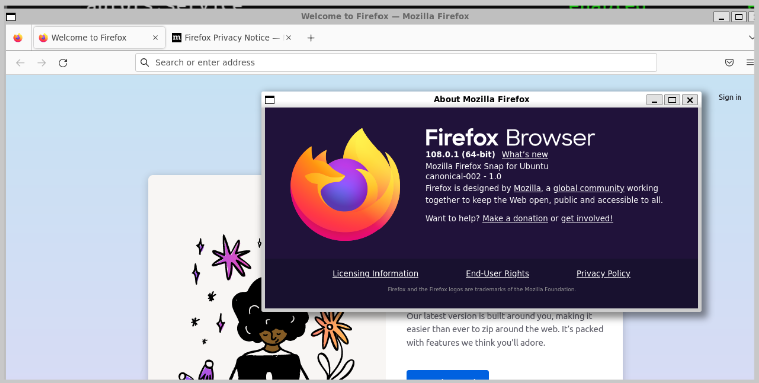

To allow external websites, import this certificate `/usr/local/share/ca-certificates/cert_M_X5C_sase-mob-sslfwd-trust-ca.crt` in the certificate manager

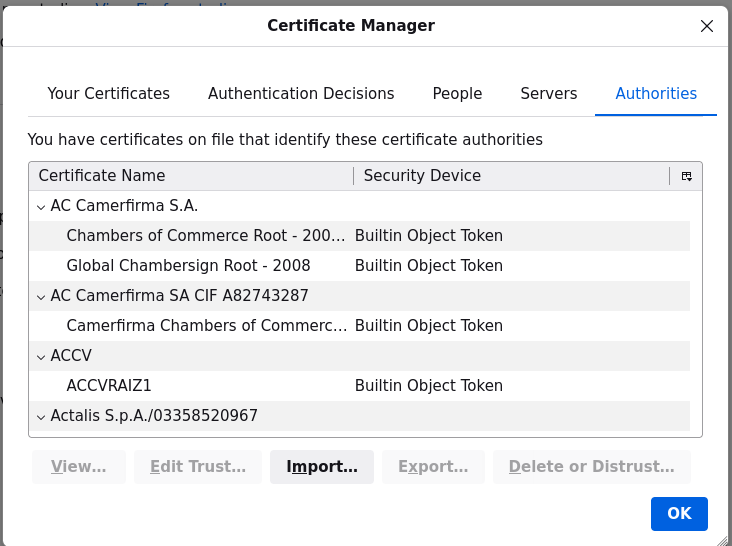

## nautilus

And install nautilus
```bash
sudo apt install nautilus nautilus-extension-gnome-terminal
```

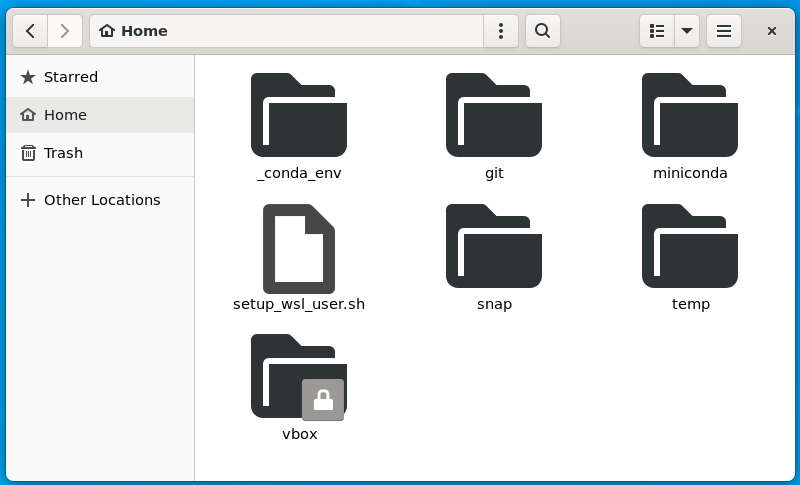

## sublime text

I like this text editor even if it is not exactly opensource.

I may even buy a license later.

Anyway I will use the snap version

```bash
sudo snap install sublime-text --classic
```

and because of this issue from WSLg [WSL some icons in taskbar for linux applications are defaulting to Tux](https://github.com/microsoft/wslg/issues/944#issuecomment-1399107496), I add this

```bash
cd /var/lib/snapd/desktop/applications
sudo ln -s sublime-text_subl.desktop  sublime_text.desktop
cd ~/bin
touch sublime_text
chmod +x sublime_text
tee sublime_text << EOF
#!/bin/bash
env BAMF_DESKTOP_FILE_HINT=/var/lib/snapd/desktop/applications/sublime-text_subl.desktop /snap/bin/sublime-text.subl --launch-or-new-window
EOF
```

Launching `sublime_text` in command line should open sublime_text with matching icon in taskbar. The same when right clicking a text file in nautilus and editing with sublime text.

## gnome-tweaks and yaru theme

```bash
sudo add-apt-repository univ
sudo apt-get -y install gnome-tweaks
sudo apt-get -y install yaru-theme-gtk
sudo apt-get -y install yaru-theme-icon
```

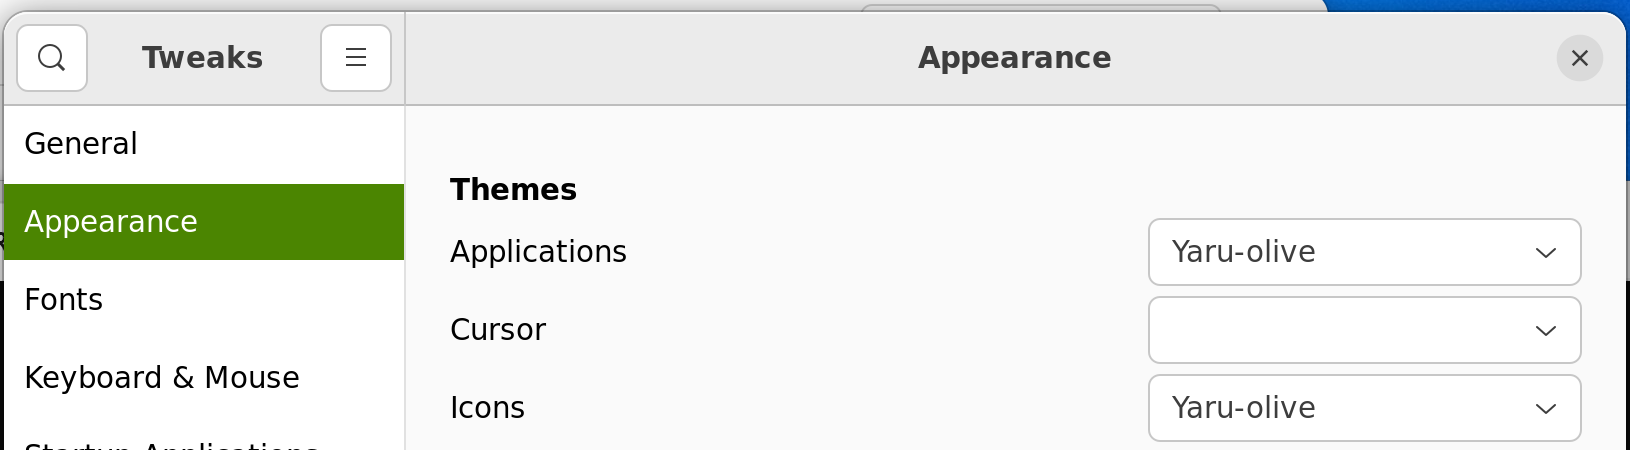

And impact on nautilus is directly visible

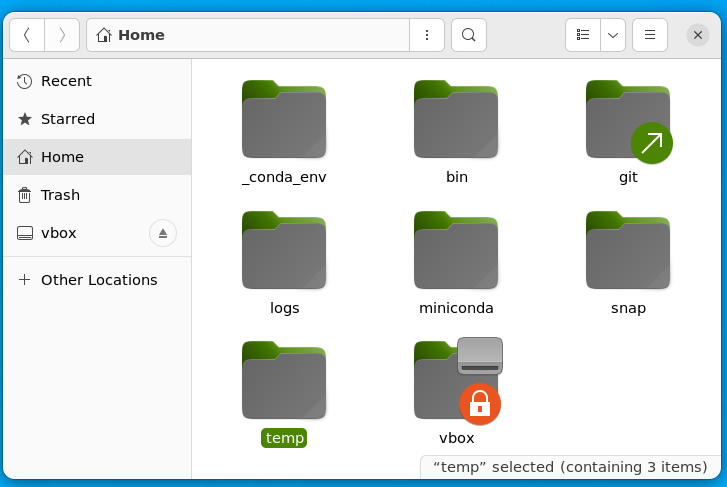

## tilix

tilix is a terminal with split windows integrated (as with tmux or screen or vi)

```bash
sudo apt install tilix
```

**use zsh / powerlevel10k fonts**
sandwich > Preferences > Profiles / Default > Text Appearance / Custom Font >  MesloLGS NF Regular

**update Copy/Paste shortcuts**
sandwich > Preferences > Shortcuts >  Copy (Ctrl-C) and Paste (Ctrl-V)
as for other terminals, interrupt is now Shift-Ctrl-C

**vte config**
as explained in https://gnunn1.github.io/tilix-web/manual/vteconfig/
add this in `.zshrc`
```bash
if [ $TILIX_ID ] || [ $VTE_VERSION ]; then
        source /etc/profile.d/vte.sh
fi
```
and create this symlink
```bash
ln -s /etc/profile.d/vte-2.91.sh /etc/profile.d/vte.sh
```


## gimp

And install gimp
```bash
sudo apt install gimp
```

## zotero

```bash
snap find zotero
Name         Version  Publisher   Notes  Summary
zotero-snap  6.0.18   extraymond  -      Zotero helps you collect, organize, cite, and share research.
qnotero      2.3.1    ealbiter    -      Standalone sidekick to Zotero reference manager.
zotviewer    1.5.0    fvalle      -      Zotero Visualizer

sudo snap install zotero-snap
zotero-snap 6.0.18 from extraymond installed
```

and there is something to do to activate sync: https://github.com/extraymond/zotero-snap/issues/29

```bash
FIREFOX_PROFILE=`find ~/snap/firefox/common/.mozilla/ -name *.default`
ZOTERO_PROFILE=`find ~/snap/zotero-snap/common/.zotero/ -name *.default`
cp $FIREFOX_PROFILE/cert9.db $ZOTERO_PROFILE
cp $FIREFOX_PROFILE/key4.db $ZOTERO_PROFILE
cp $FIREFOX_PROFILE/pkcs11.txt $ZOTERO_PROFILE
``` 

## pdf support

```bash
#acrobat reader (which uses wine)
sudo snap install acrordrdc

#evince universal documen reader for ubuntu
sudo apt install evince
```

# Run gnome-session in Ubuntu LTS

for the moment I don't recommend to do it in the main distro.

It is just as a test. Lots of stuffs don't work as expected.

## install test distro **from scratch**


from powershell

```bash
wsl --import ubuntu-x11 C:\wsl\Ubuntu-22.04_X11\instance C:\wsl\Ubuntu-22.04_X11\download\ubuntu-jammy-wsl-amd64-wsl.rootfs.tar.gz
wsl -d ubuntu-x11
cd
cp /mnt/c/wsl/Ubuntu-22.04_X11/download/setup_wsl_* ~/
chmod +x setup_wsl_root.sh
./setup_wsl_root.sh
```

from powershell
```bash
wsl -t ubuntu-x11
```

start ubuntu-x11 from windows terminal menu

and enter informations requested (ssh keys (paste to gitlab), update certificates (enter password)). Other steps are automatic.

Other steps:
- activate systemd (by modifying /etc/wsl.conf)
- restart


## activate gnome-session and launch gnome-shell


Here we have a fully working distro. And we will test what is suggested at : https://askubuntu.com/a/1445415

* Create the file /etc/pam.d/system/systemd-user
* Restart distro
* `sudo apt install ubuntu-desktop acpi-support-`
* prevent gdm service to start
    - `sudo systemctl stop gdm.service`
    - `sudo systemctl disable gdm.service`
* activate x11 config at boot
```bash
sudo systemctl is-enabled rc-local.service
(if static it means it has be activated)
sudo systemctl enable rc-local.service
```
```bash
#create rc.local file
sudo vi /etc/rc.local

#!/bin/sh -e
mount -o rw,remount /tmp/.X11-unix/
chmod +t /tmp/.X11-unix
chmod o+rw /dev/dri/renderD128
/usr/libexec/at-spi-bus-launcher --launch-immediately &
exit 0

#save & exit
sudo chmod 700 /etc/rc.local
```
* `sudo usermod -a -G adm guillaume`
* Restart distro
* launch `XDG_SESSION_TYPE=x11 gnome-session --disable-acceleration-check --session=ubuntu --systemd-service > /dev/null 2>&1` (this can be added to .bashrc or as a service)


and then

* `MUTTER_DEBUG_DUMMY_MODE_SPECS=1920x1080 gnome-shell --nested --no-x11 2> /dev/null &`


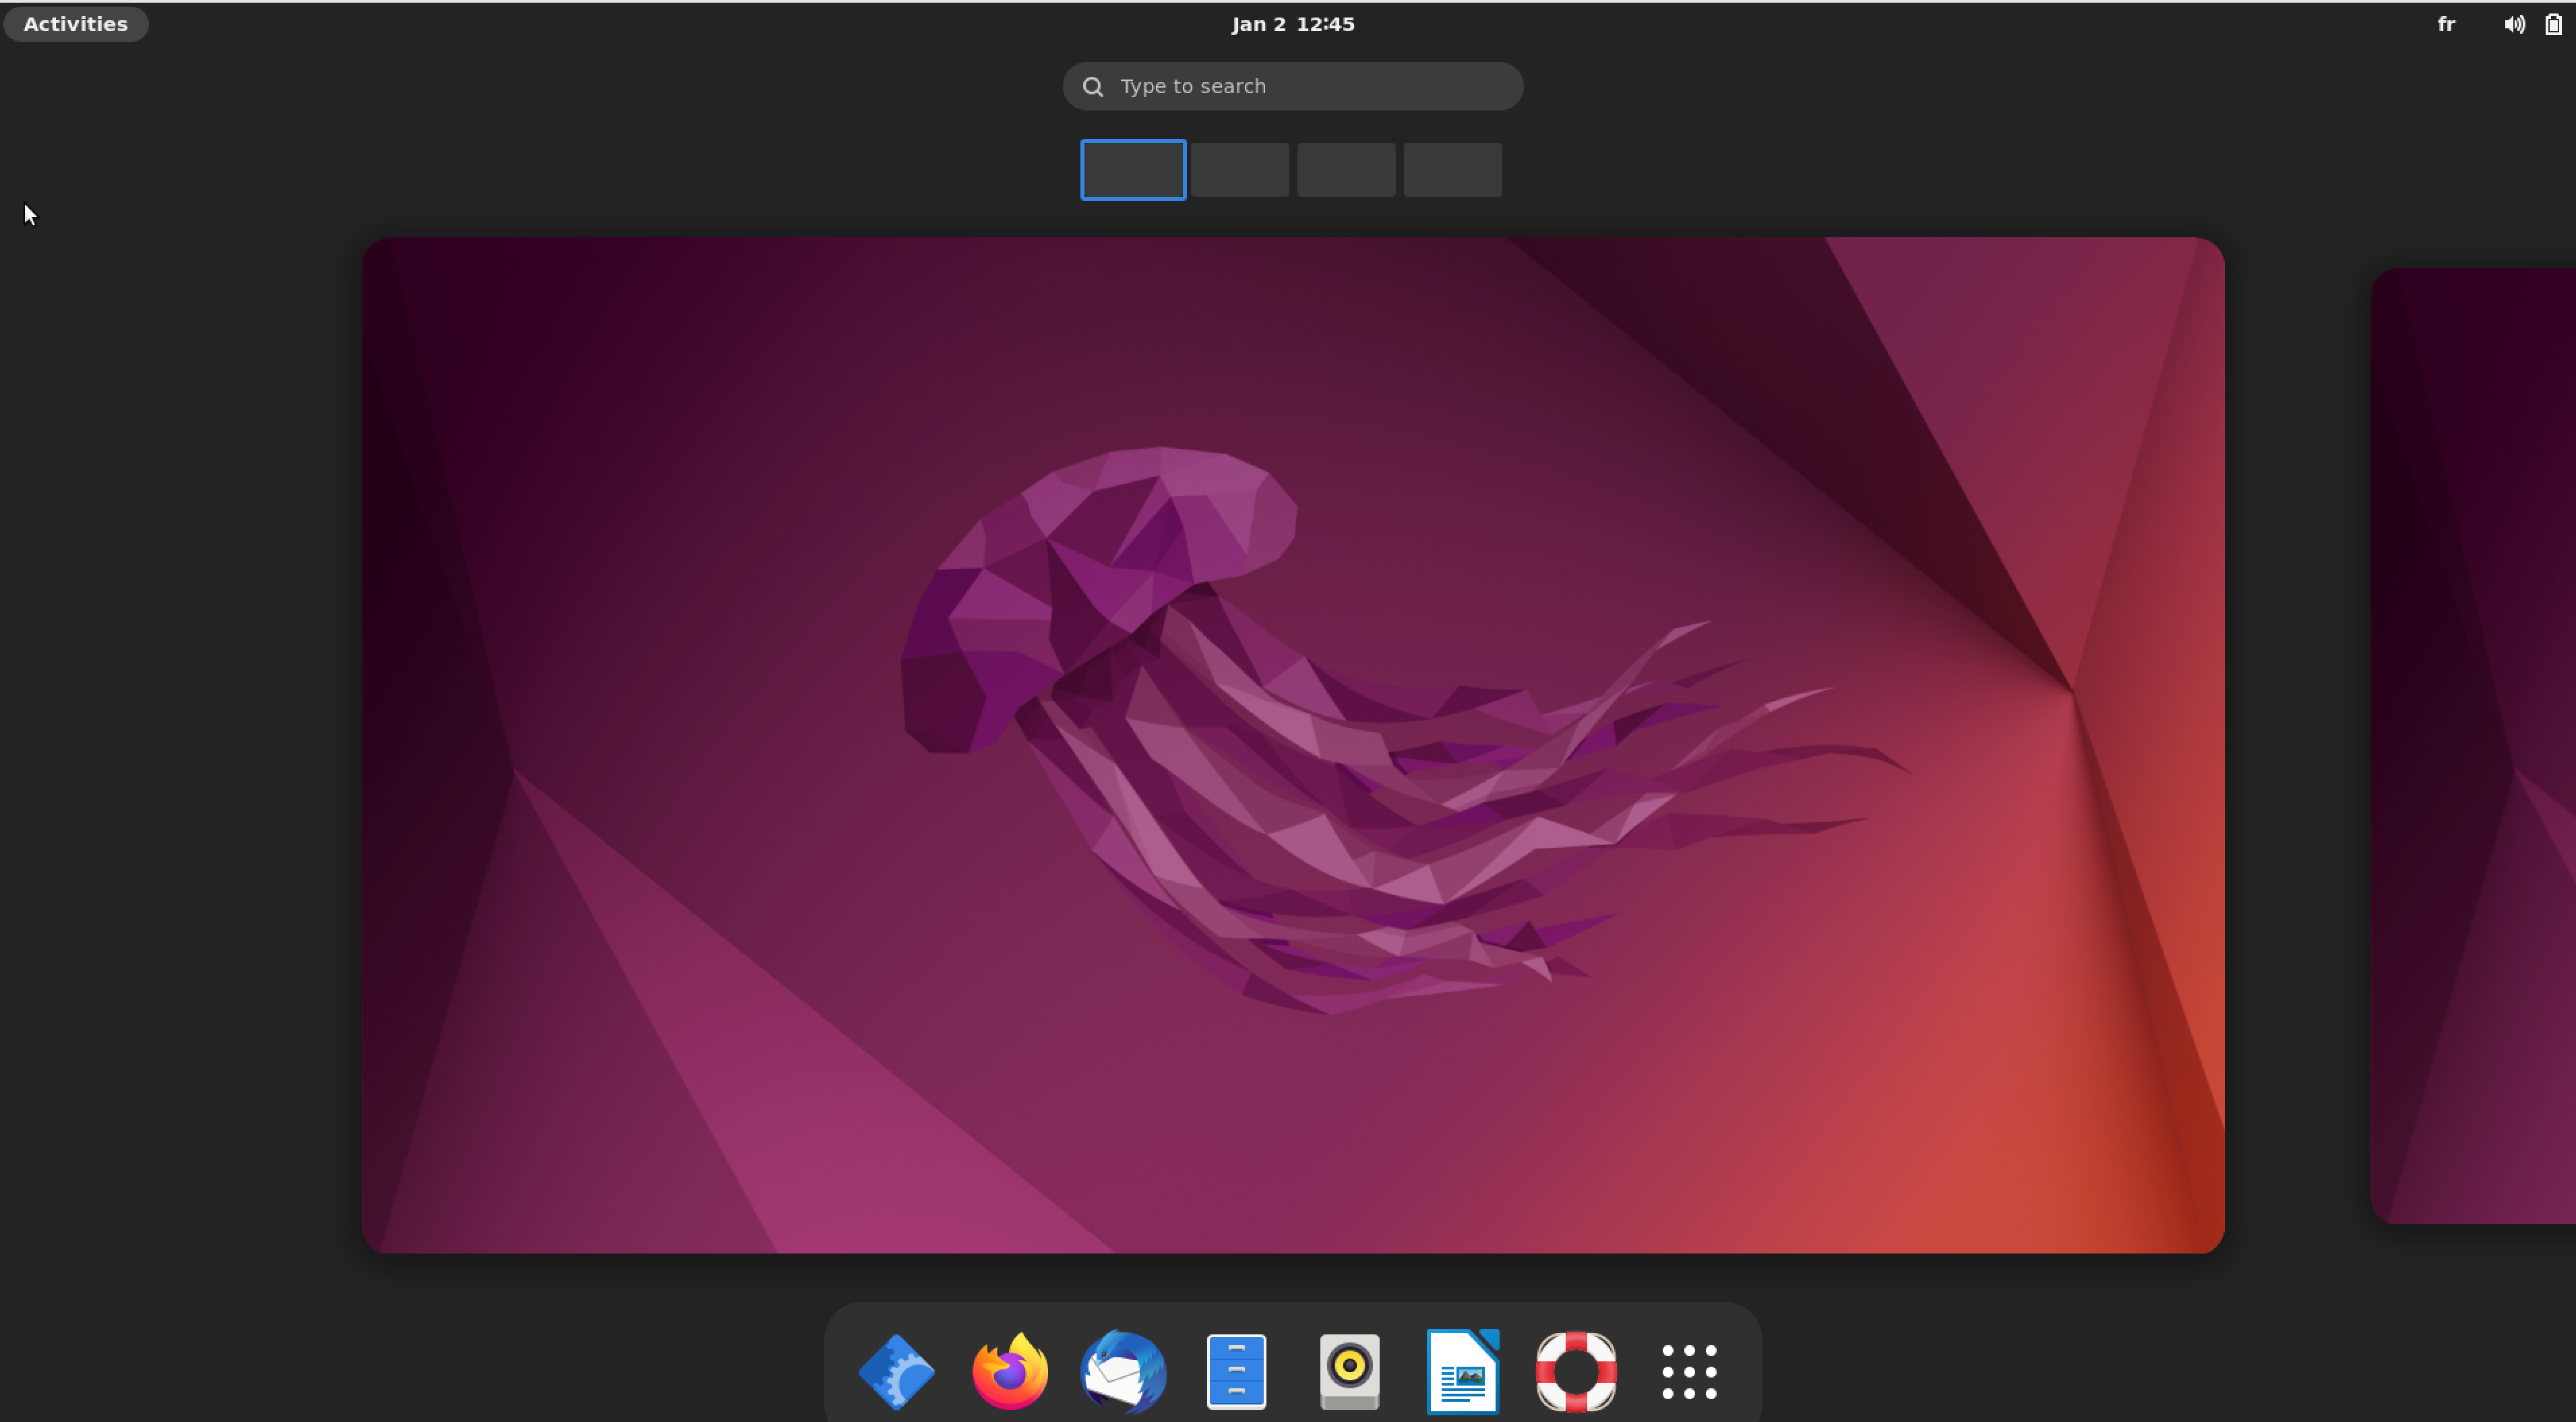


Then we can start it by running `gnomeshell.sh`

```bash
cat bin/gnomeshell.sh
#!/bin/bash
MUTTER_DEBUG_DUMMY_MODE_SPECS=1920x1080 gnome-shell --nested --no-x11 2> /dev/null &
```